In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [3]:
test = pd.read_csv("test.csv")
test.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [4]:
df = pd.concat([train, test], axis = 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74498 entries, 0 to 14899
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents      7

In [6]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [7]:
df.shape

(74498, 24)

In [8]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(f'{col}: {df[col].unique()}')

Gender: ['Male' 'Female']
Job Role: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Work-Life Balance: ['Excellent' 'Poor' 'Good' 'Fair']
Job Satisfaction: ['Medium' 'High' 'Very High' 'Low']
Performance Rating: ['Average' 'Low' 'High' 'Below Average']
Overtime: ['No' 'Yes']
Education Level: ['Associate Degree' 'Master’s Degree' 'Bachelor’s Degree' 'High School'
 'PhD']
Marital Status: ['Married' 'Divorced' 'Single']
Job Level: ['Mid' 'Senior' 'Entry']
Company Size: ['Medium' 'Small' 'Large']
Remote Work: ['No' 'Yes']
Leadership Opportunities: ['No' 'Yes']
Innovation Opportunities: ['No' 'Yes']
Company Reputation: ['Excellent' 'Fair' 'Poor' 'Good']
Employee Recognition: ['Medium' 'Low' 'High' 'Very High']
Attrition: ['Stayed' 'Left']


> Ordinal encoding::   Gender, Overtime, Marital Status, Job Level, Company Size, Remote Work, Leadership Opportunities,
        Innovation Opportunities
        
> label encoding: Attrition
    
> one-hot-encoding: Job Role, Work-Life Balance, Job Satisfaction, Performance Rating, Education Level, Company Reputation,
    Employee Recognition

In [10]:
# predicted column
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

In [11]:
ordinal_columns = [
    'Gender', 'Overtime', 'Marital Status', 'Job Level', 
    'Company Size', 'Remote Work', 'Leadership Opportunities',
    'Innovation Opportunities'
]
ordinal_encoder = OrdinalEncoder()
df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns]).astype('int')

In [12]:
one_hot_columns = [
    'Job Role', 'Work-Life Balance', 'Job Satisfaction', 
    'Performance Rating', 'Education Level', 
    'Company Reputation', 'Employee Recognition', 
]
df = pd.get_dummies(df, columns=one_hot_columns, dtype= 'int32')

In [13]:
corr_Attrition = df.corr()['Attrition'].sort_values(ascending= False)
corr_Attrition

Attrition                            1.000000
Job Level                            0.315289
Remote Work                          0.221191
Work-Life Balance_Excellent          0.111051
Work-Life Balance_Good               0.110919
Education Level_PhD                  0.107316
Gender                               0.100637
Company Reputation_Good              0.089523
Number of Promotions                 0.081184
Number of Dependents                 0.074606
Years at Company                     0.065388
Age                                  0.050801
Job Satisfaction_High                0.049681
Performance Rating_Average           0.034275
Company Tenure                       0.028964
Company Reputation_Excellent         0.023437
Innovation Opportunities             0.021548
Job Satisfaction_Medium              0.020815
Performance Rating_High              0.012761
Leadership Opportunities             0.011995
Monthly Income                       0.010687
Employee Recognition_Very High    

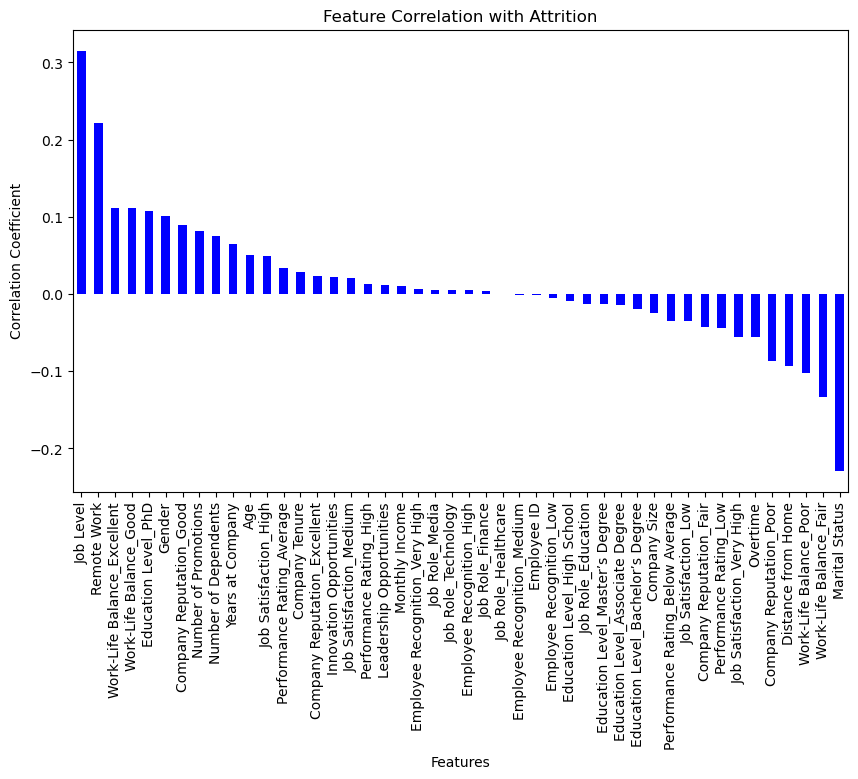

In [14]:
plt.figure(figsize = (10, 6))
corr_Attrition.drop('Attrition').plot(kind = 'bar', color='blue')
plt.title('Feature Correlation with Attrition')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

In [15]:
features = corr_Attrition[abs(corr_Attrition) > 0.1].index
features

Index(['Attrition', 'Job Level', 'Remote Work', 'Work-Life Balance_Excellent',
       'Work-Life Balance_Good', 'Education Level_PhD', 'Gender',
       'Work-Life Balance_Poor', 'Work-Life Balance_Fair', 'Marital Status'],
      dtype='object')

In [16]:
X = df[features[1:]]
y = df['Attrition']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 51)

# Logistic regression

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


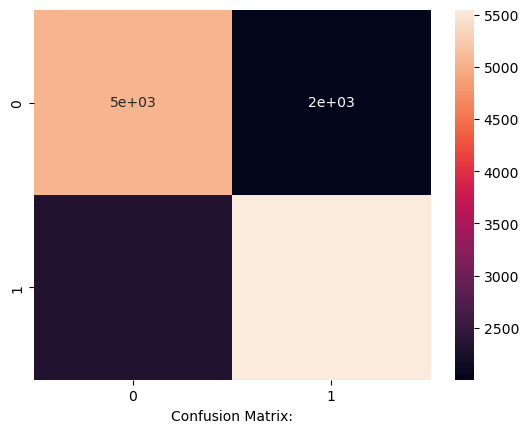

In [23]:
con = confusion_matrix(y_test, y_pred)

sns.heatmap(con, annot = True)
plt.xlabel('Confusion Matrix:')
plt.show()

In [24]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      7039
           1       0.73      0.71      0.72      7861

    accuracy                           0.71     14900
   macro avg       0.71      0.71      0.71     14900
weighted avg       0.71      0.71      0.71     14900



In [25]:
auc_score = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc_score:.2f}')

AUC: 0.71


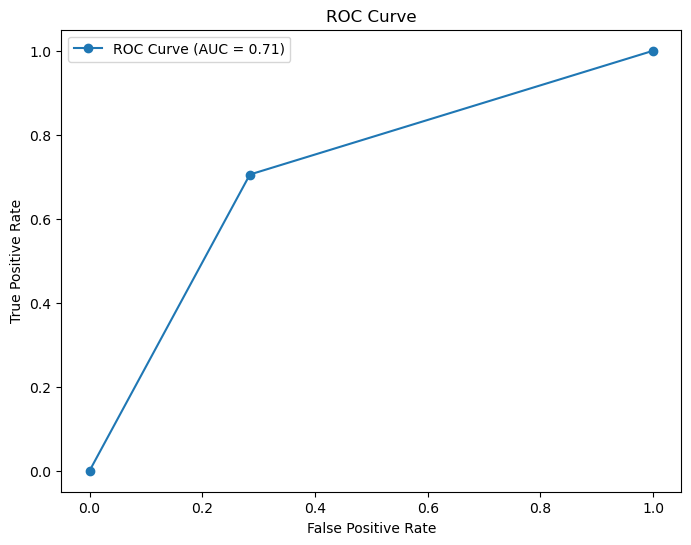

In [26]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {np.mean(scores)}')

Cross-validation scores: [0.71543624 0.71040268 0.71483221 0.71145714 0.71662528]
Average cross-validation score: 0.7137507125157267


# Decision Tree

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 51)

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=7, min_samples_split=10, min_samples_leaf=5)


clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=10)

In [31]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.72
